In [284]:
import pandas as pd
import jalali_pandas

In [312]:
# read data
df = pd.read_csv("year.csv")
df 


,تاريخ,حجممعاملات,ارزشمعاملات,تعدادمعاملات
0,1401/12/24,2438075,856515768071,12111
1,1401/12/23,2491141,554641132644,11179
2,1401/12/22,1544843,488536934817,9248
3,1401/12/21,1517794,379283065441,9427
4,1401/12/20,2500683,829880214724,13780
...,...,...,...,...
230,1401/01/10,584204,101498424608,12198
231,1401/01/09,507489,99766164403,11979
232,1401/01/08,557494,99203707800,12386
233,1401/01/07,609190,25992616026,12286


In [314]:
# rename columns
column_names = df.columns
df.rename(columns={
    column_names[0]: "date", 
    column_names[1]: "volume", 
    column_names[2]: "value", 
    column_names[3]: "number", 
    }, inplace=True)

df

,date,volume,value,number
0,1401/12/24,2438075,856515768071,12111
1,1401/12/23,2491141,554641132644,11179
2,1401/12/22,1544843,488536934817,9248
3,1401/12/21,1517794,379283065441,9427
4,1401/12/20,2500683,829880214724,13780
...,...,...,...,...
230,1401/01/10,584204,101498424608,12198
231,1401/01/09,507489,99766164403,11979
232,1401/01/08,557494,99203707800,12386
233,1401/01/07,609190,25992616026,12286


In [315]:
# convert to date format
df["date"] = df["date"].jalali.parse_jalali("%Y/%m/%d")
df

,date,volume,value,number
0,1401-12-24 00:00:00,2438075,856515768071,12111
1,1401-12-23 00:00:00,2491141,554641132644,11179
2,1401-12-22 00:00:00,1544843,488536934817,9248
3,1401-12-21 00:00:00,1517794,379283065441,9427
4,1401-12-20 00:00:00,2500683,829880214724,13780
...,...,...,...,...
230,1401-01-10 00:00:00,584204,101498424608,12198
231,1401-01-09 00:00:00,507489,99766164403,11979
232,1401-01-08 00:00:00,557494,99203707800,12386
233,1401-01-07 00:00:00,609190,25992616026,12286


In [316]:
# sort days
df.sort_index(ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)

df

,date,volume,value,number
0,1401-01-06 00:00:00,428048,37048618605,7047
1,1401-01-07 00:00:00,609190,25992616026,12286
2,1401-01-08 00:00:00,557494,99203707800,12386
3,1401-01-09 00:00:00,507489,99766164403,11979
4,1401-01-10 00:00:00,584204,101498424608,12198
...,...,...,...,...
230,1401-12-20 00:00:00,2500683,829880214724,13780
231,1401-12-21 00:00:00,1517794,379283065441,9427
232,1401-12-22 00:00:00,1544843,488536934817,9248
233,1401-12-23 00:00:00,2491141,554641132644,11179


In [317]:
# max value
cond = df["value"] == df["value"].max()

print(df["value"].max()/1e10, "B toman")

df[cond]


142.629422765 B toman


,date,volume,value,number
222,1401-12-07 00:00:00,4649611,1426294227650,21402


In [318]:
# max mean-value
cond = (df["value"]/df["number"]) == (df["value"]/df["number"]).max()

print((df["value"]/df["number"]).max()/1e7, "M toman")

df[cond]

7.07221342639749 M toman


,date,volume,value,number
234,1401-12-24 00:00:00,2438075,856515768071,12111


In [319]:
import matplotlib.pyplot as plt

from bidi.algorithm import get_display
from arabic_reshaper import reshape


In [321]:
groups = df.jalali.groupby("month").sum()
groups

,value,number,volume
__month,,,
1,1442206360477,182589,8777301
2,1549437440858,148617,7425005
3,808984261412,138213,7665026
4,650711539052,122931,7843528
5,1224670300196,93042,15965166
6,1574807677390,93387,19535310
7,2070810269586,97747,25157710
8,4494214970588,183283,45670782
9,9143452287373,228307,45995269


In [322]:
# bar plot data
x = [
    "فروردین",
    "اردیبهشت",
    "خرداد",
    "تیر",
    "مرداد",
    "شهریور",
    "مهر",
    "آبان",
    "آذر",
    "دی",
    "بهمن",
    "اسفند",
]

x = [get_display(reshape(month)) for month in x]

y = groups["value"] / 1e10


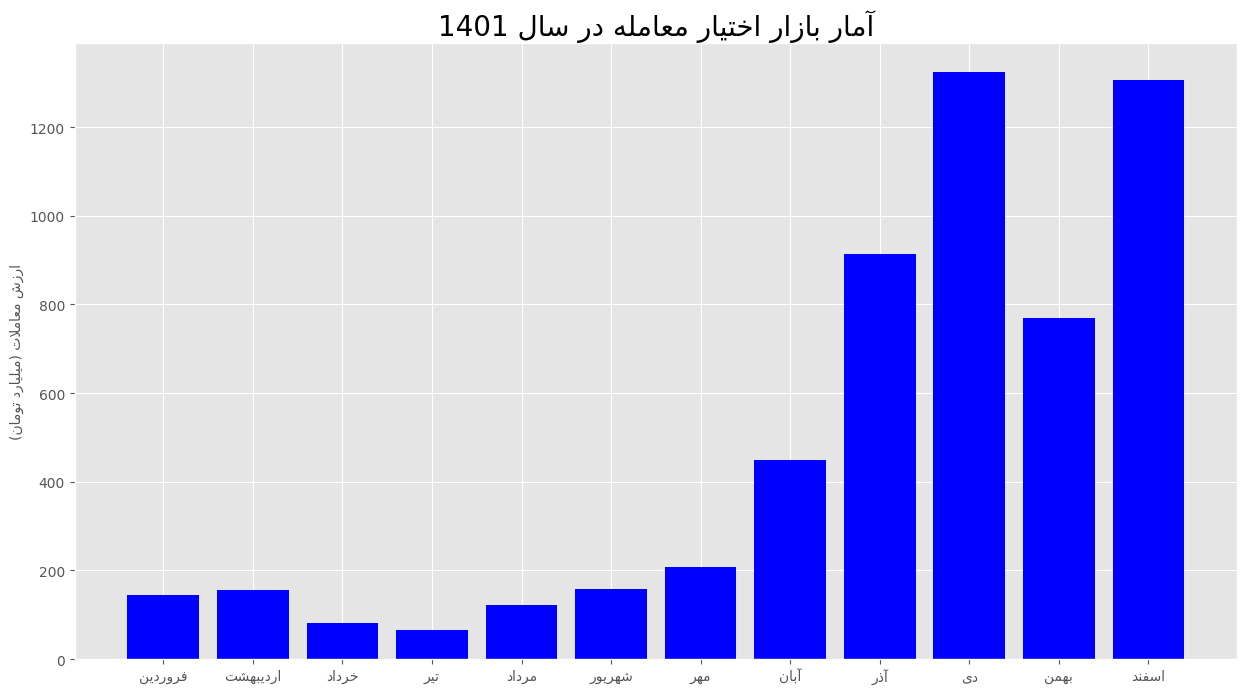

In [325]:
plt.style.use('ggplot')

fig = plt.figure(figsize = (15, 8))

plt.bar(x, y, color ='blue')

title = "آمار بازار اختیار معامله در سال 1401"
plt.title(get_display(reshape(title)), fontsize=20)


ylable = "ارزش معاملات (میلیارد تومان)"
plt.ylabel(get_display(reshape(ylable)), fontsize=10)


plt.show()
